In [1]:
import xarray as xr
import numpy as np
import cmocean as cm
import os
import pandas as pd

In [2]:
!pwd

/g/data/v45/jm5970/scripts_papers/CEKE_climatology_paper/figures


In [3]:
from dask.distributed import Client

In [4]:
import pylab as plt

In [5]:
%matplotlib inline

In [6]:
client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 6
Total threads: 24,Total memory: 96.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:35941,Workers: 6
Dashboard: /proxy/8787/status,Total threads: 24
Started: Just now,Total memory: 96.00 GiB
Comm: tcp://127.0.0.1:42485,Total threads: 4
Dashboard: /proxy/43049/status,Memory: 16.00 GiB
Nanny: tcp://127.0.0.1:38677,


In [7]:
from matplotlib.collections import LineCollection
import matplotlib as mpl

In [8]:
path='/g/data/v45/jm5970/trackeddy_output/AVISO+/post-processing/satellite_KE_*.nc'
KE=xr.open_mfdataset(path,chunks={'latitude': 720//4, 'longitude': 1440//4, 'time': 10}).sortby('time')

In [9]:
path='/g/data/v45/jm5970/trackeddy_output/AVISO+/post-processing/satellite_EKE_field_*.nc'
EKE=xr.open_mfdataset(path,chunks={'lat': 720//4, 'lon': 1440//4, 'time': 10}).sortby('time')

In [10]:
path='/g/data/v45/jm5970/trackeddy_output/AVISO+/post-processing/eddy/satellite_TEKE_eddy*.nc'
CEKE=xr.open_mfdataset(path,chunks={'lat': 720//4, 'lon': 1440//4, 'time': 10}).sortby('time')

In [11]:
path='/g/data/v45/jm5970/trackeddy_output/AVISO+/post-processing/residual/satellite_TEKE_res_*.nc'
REKE=xr.open_mfdataset(path,chunks={'lat': 720//4, 'lon': 1440//4, 'time': 10}).sortby('time')

In [12]:
output_path = "/home/156/jm5970/hh5/climatology_V2/"

In [13]:
KE_dayly_sat_nh = xr.open_dataset(output_path+"KE_dayly_sat_nh_a_weighted.nc")
EKE_dayly_sat_nh = xr.open_dataset(output_path+"EKE_dayly_sat_nh_a_weighted.nc")
CEKE_dayly_sat_nh = xr.open_dataset(output_path+"CEKE_dayly_sat_nh_a_weighted.nc")
REKE_dayly_sat_nh = xr.open_dataset(output_path+"REKE_dayly_sat_nh_a_weighted.nc")

KE_dayly_sat_sh = xr.open_dataset(output_path+"KE_dayly_sat_sh_a_weighted.nc")
EKE_dayly_sat_sh = xr.open_dataset(output_path+"EKE_dayly_sat_sh_a_weighted.nc")
CEKE_dayly_sat_sh = xr.open_dataset(output_path+"CEKE_dayly_sat_sh_a_weighted.nc")
REKE_dayly_sat_sh = xr.open_dataset(output_path+"REKE_dayly_sat_sh_a_weighted.nc")

In [14]:
KE_dayly_sat_nh

<xarray.Dataset>
Dimensions:          (time: 10016, day: 10016)
Coordinates:
  * time             (time) datetime64[ns] 1993-01-01 1993-01-02 ... 2020-06-03
  * day              (day) int64 1 2 3 4 5 6 7 8 ... 149 150 151 152 153 154 155
Data variables:
    KE_dayly_sat_nh  (time) float64 ...

In [15]:
year=[int(t) for t in KE_dayly_sat_nh['time'].dt.strftime('%Y').values]

In [16]:
cbar_text=['Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec','Jan']

In [17]:
solar_map = plt.get_cmap(cm.cm.solar_r, 12)

In [18]:
path='/g/data/rr7/JRA55/6hr/atmos/'

In [19]:
u_10_p='uas/v1/uas_*.nc'
v_10_p='vas/v1/vas_*.nc'

In [20]:
u_10=xr.open_mfdataset(path+u_10_p,combine='nested',concat_dim='time',chunks={'time':100,'lon':320,'lat':160},parallel=True)
v_10=xr.open_mfdataset(path+v_10_p,combine='nested',concat_dim='time',chunks={'time':100,'lon':320,'lat':160},parallel=True)

In [21]:
wind_mag = np.sqrt(u_10.uas**2 + v_10.vas**2)

In [22]:
wind_mag = wind_mag.chunk({'time':271})

In [23]:
mean_wind_mag_year_nh = wind_mag.sel(lat=slice(10,60)).mean(('lat','lon')).rolling(time=30, center=True).mean().groupby('time.dayofyear').mean('time').compute()

/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: overflow encountered in square
  return func(*(_execute_task(a, cache) for a in args))


In [24]:
mean_wind_mag_year_sh = wind_mag.sel(lat=slice(-60,-10)).mean(('lat','lon')).rolling(time=30, center=True).mean().groupby('time.dayofyear').mean('time').compute()

/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: overflow encountered in square
  return func(*(_execute_task(a, cache) for a in args))


In [25]:
from matplotlib import colors

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    """
    Truncate colormap.
    """
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap


In [26]:
solar_map = plt.get_cmap(truncate_colormap(cm.cm.balance,0.05,0.95), 12)

In [27]:
mean_wind_mag_year_nh_month = wind_mag.sel(lat=slice(10,60)).mean(('lat','lon')).groupby('time.month').mean('time').compute()

In [28]:
mean_wind_mag_year_sh_month = wind_mag.sel(lat=slice(-60,-10)).mean(('lat','lon')).groupby('time.month').mean('time').compute()

/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: overflow encountered in square
  return func(*(_execute_task(a, cache) for a in args))


In [29]:
plt.rcParams.update({'font.size': 9})

In [30]:
import matplotlib.gridspec as gridspec

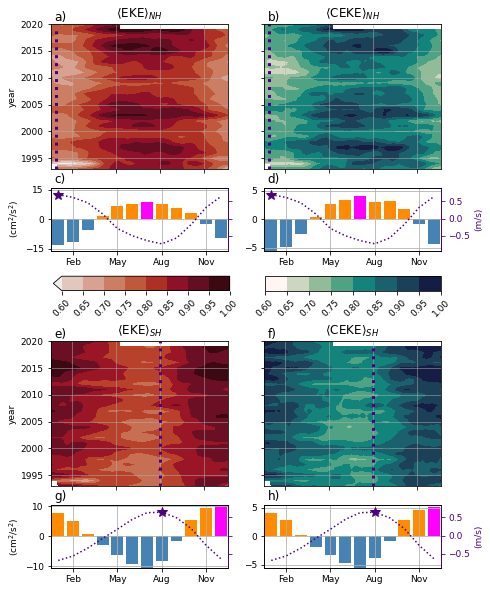

In [50]:
wind_color = 'indigo'
fig=plt.figure(figsize=(7,10))

#################################################################
grid = plt.GridSpec(2, 2, wspace=0.2, hspace=0.4)
#################################################################

grid_top_left = gridspec.GridSpecFromSubplotSpec(3, 1, subplot_spec=grid[0,0], hspace=0.3)
grid_top_right = gridspec.GridSpecFromSubplotSpec(3, 1, subplot_spec=grid[0,1], hspace=0.3)
grid_bottom_left = gridspec.GridSpecFromSubplotSpec(3, 1, subplot_spec=grid[1,0], hspace=0.3)
grid_bottom_right = gridspec.GridSpecFromSubplotSpec(3, 1, subplot_spec=grid[1,1], hspace=0.3)

axs1 = fig.add_subplot(grid_top_left[0:2])

data_frame = (EKE_dayly_sat_nh.EKE_dayly_sat_nh.rolling(time=30, center=True).mean()*10000).to_dataframe()
data_frame['year']=data_frame.index.year
data_frame['day']=data_frame.index.dayofyear
array = data_frame.set_index(['year','day']).to_xarray()
normalized_array = array/array.max()
eke_cbar = normalized_array.EKE_dayly_sat_nh.plot.contourf(
    ax=axs1,
    cmap=cm.cm.amp,
    add_colorbar=False,
    vmin=0.6,
    vmax=1,
    levels=9
)
wind_mag_plot = mean_wind_mag_year_nh
max_day = wind_mag_plot.argmax()
axs1.plot([max_day,max_day],[1993,2019],':',color=wind_color,linewidth=3)
axs1.set_ylim(1993,2020)
axs1.set_xticks(np.arange(45,365,2*45))
axs1.grid(linewidth=0.5)
axs1.set_xticklabels([])
axs1.set_xlabel('')

axs1.set_title(r'$\left<\mathrm{EKE}\right>_{NH}$',y=1,fontsize=12)
# axs1.set_xticklabels(cbar_text[::-2], minor=False, rotation=45);
################################################################
axs2 = fig.add_subplot(grid_top_right[0:2])
plt.setp(axs2.get_yticklabels(), visible=False)

data_frame = (CEKE_dayly_sat_nh.CEKE_dayly_sat_nh.rolling(time=30, center=True).mean()*10000).to_dataframe()
data_frame['year']=data_frame.index.year
data_frame['day']=data_frame.index.dayofyear
array = data_frame.set_index(['year','day']).to_xarray()
normalized_array = array/array.max()
normalized_array.CEKE_dayly_sat_nh.plot.contourf(
    ax=axs2,
    cmap=cm.cm.tempo,
    add_colorbar=False,
    vmin=0.6,
    vmax=1,
    levels=9
)

wind_mag_plot = mean_wind_mag_year_nh
max_day = wind_mag_plot.argmax()
axs2.plot([max_day,max_day],[1993,2020],':',color=wind_color,linewidth=3)
axs2.set_ylim(1993,2020)
axs2.set_xticks(np.arange(45,365,2*45))
axs2.grid(linewidth=0.5)
axs2.set_xticklabels([])
axs2.set_xlabel('')
axs2.set_ylabel('')

axs2.set_title(r'$\left<\mathrm{CEKE}\right>_{NH}$',y=1,fontsize=12)
# axs2.set_xticklabels(cbar_text[::-2], minor=False, rotation=45);
# #################################################################
axs3 = fig.add_subplot(grid_bottom_left[0:2])

data_frame = (EKE_dayly_sat_sh.EKE_dayly_sat_sh.rolling(time=30, center=True).mean()*10000).to_dataframe()
data_frame['year']=data_frame.index.year
data_frame['day']=data_frame.index.dayofyear
array = data_frame.set_index(['year','day']).to_xarray()
normalized_array = array/array.max()
normalized_array.EKE_dayly_sat_sh.plot.contourf(
    ax=axs3,
    cmap=cm.cm.amp,
    add_colorbar=False,
    vmin=0.6,
    vmax=1,
    levels=9
)

wind_mag_plot = mean_wind_mag_year_sh
max_day = wind_mag_plot.argmax()
axs3.plot([max_day,max_day],[1993,2020],':',color=wind_color,linewidth=3)
axs3.set_ylim(1993,2020)
axs3.set_xticks(np.arange(45,365,2*45))
axs3.grid(linewidth=0.5)
axs3.set_xticklabels([])
axs3.set_xlabel('')

axs3.set_title(r'$\left<\mathrm{EKE}\right>_{SH}$',y=1,fontsize=12)
# axs3.set_xticklabels(cbar_text[::-2], minor=False, rotation=45);
# #################################################################
axs4 = fig.add_subplot(grid_bottom_right[0:2])
plt.setp(axs4.get_yticklabels(), visible=False)
                       
data_frame = (CEKE_dayly_sat_sh.CEKE_dayly_sat_sh.rolling(time=30, center=True).mean()*10000).to_dataframe()
data_frame['year']=data_frame.index.year
data_frame['day']=data_frame.index.dayofyear
array = data_frame.set_index(['year','day']).to_xarray()
normalized_array = array/array.max()
ceke_cbar = normalized_array.CEKE_dayly_sat_sh.plot.contourf(
    ax=axs4,
    cmap=cm.cm.tempo,
    add_colorbar=False,
    vmin=0.6,
    vmax=1,
    levels=9
)
wind_mag_plot = mean_wind_mag_year_sh
max_day = wind_mag_plot.argmax()
axs4.plot([max_day,max_day],[1993,2019],':',color=wind_color,linewidth=3)
axs4.set_ylim(1993,2020)
axs4.set_xticks(np.arange(45,365,2*45))
axs4.grid(linewidth=0.5)
axs4.set_xticklabels([])
axs4.set_xlabel('')
axs4.set_ylabel('')

axs4.set_title(r'$\left<\mathrm{CEKE}\right>_{SH}$',y=1,fontsize=12)
# axs4.set_xticklabels(cbar_text[::-2], minor=False, rotation=45);
# #################################################################


cbar_ax = fig.add_axes([0.13, 0.51, 0.35, 0.02],label='cbar')
cbar = fig.colorbar(eke_cbar, cax=cbar_ax,orientation='horizontal')
cbar.ax.tick_params(rotation=45)

cbar_ax = fig.add_axes([0.55, 0.51, 0.35, 0.02],label='cbar')
cbar = fig.colorbar(ceke_cbar, cax=cbar_ax,orientation='horizontal')
cbar.ax.tick_params(rotation=45)


# ########################################################################
# ############################### Seasonal ###############################
# ########################################################################
axs5 = fig.add_subplot(grid_top_left[2])
eke_climatology = (EKE_dayly_sat_nh.EKE_dayly_sat_nh*10000).groupby('time.month').mean('time')

anomaly_plot = eke_climatology - eke_climatology.mean()
axs5.bar(eke_climatology.month, (anomaly_plot).where(anomaly_plot>0),color='darkorange')
axs5.bar(eke_climatology.month, (anomaly_plot).where(anomaly_plot<0),color='steelblue')
axs5.bar(eke_climatology.month, (anomaly_plot).where(anomaly_plot==anomaly_plot.max()),color='magenta')
axs5.set_ylim(-16,16)
axs5.set_ylabel('(cm$^2$/s$^2$)')

axs5_t = axs5.twinx()
wind_mag_plot = mean_wind_mag_year_nh_month-mean_wind_mag_year_nh_month.mean()
axs5_t.plot(wind_mag_plot.month, wind_mag_plot.values, linestyle=':',  color=wind_color)
max_value = wind_mag_plot.where(wind_mag_plot==wind_mag_plot.max())
axs5_t.plot(max_value.month, max_value.values, marker='*', color=wind_color, zorder=10, markersize=10)
axs5_t.set_ylim(wind_mag_plot.min()-0.2,wind_mag_plot.max()+0.2)

axs5_t.set_ylabel('')
axs5_t.set_xlabel('')
axs5_t.set_yticklabels([])
axs5_t.spines['right'].set_color(wind_color)
axs5_t.tick_params(axis='y', colors=wind_color)
# axs5_t.set_yticks([])
axs5.grid()
axs5.set_xticks(np.arange(2,13,3))
axs5.set_yticks([-15,0,15])
axs5.set_xticklabels(['Feb','May','Aug','Nov']);
axs5.set_xlim([0.5,12.5])

# ###############################################################
axs6 = fig.add_subplot(grid_top_right[2])
ceke_climatology = (CEKE_dayly_sat_nh.CEKE_dayly_sat_nh*10000).groupby('time.month').mean('time')

anomaly_plot = ceke_climatology-ceke_climatology.mean()
axs6.bar(ceke_climatology.month, (anomaly_plot).where(anomaly_plot>0),color='darkorange')
axs6.bar(ceke_climatology.month, (anomaly_plot).where(anomaly_plot<0),color='steelblue')
axs6.bar(ceke_climatology.month, (anomaly_plot).where(anomaly_plot==anomaly_plot.max()),color='magenta')
axs6.set_ylim(-5.5,5.5)

axs6_t = axs6.twinx()
wind_mag_plot = mean_wind_mag_year_nh_month-mean_wind_mag_year_nh_month.mean()
axs6_t.plot(wind_mag_plot.month, wind_mag_plot.values, linestyle=':',  color=wind_color)
max_value = wind_mag_plot.where(wind_mag_plot==wind_mag_plot.max())
axs6_t.plot(max_value.month, max_value.values, marker='*', color=wind_color, zorder=10, markersize=10)
axs6_t.set_ylim(wind_mag_plot.min()-0.2,wind_mag_plot.max()+0.2)

axs6_t.set_ylabel('')
axs6_t.set_xlabel('')
# axs6_t.set_yticklabels([])
# axs6_t.set_yticks([])
axs6_t.spines['right'].set_color(wind_color)
axs6_t.tick_params(axis='y', colors=wind_color)
axs6_t.set_ylabel('(m/s)',color=wind_color)
axs6.grid()
axs6.set_xticks(np.arange(2,13,3))
axs6.set_xticklabels(['Feb','May','Aug','Nov']);
axs6.set_xlim([0.5,12.5])

# ###############################################################
axs7 = fig.add_subplot(grid_bottom_left[2])
eke_climatology = (EKE_dayly_sat_sh.EKE_dayly_sat_sh*10000).groupby('time.month').mean('time')

anomaly_plot = eke_climatology-eke_climatology.mean()
axs7.bar(eke_climatology.month, (anomaly_plot).where(anomaly_plot>0),color='darkorange')
axs7.bar(eke_climatology.month, (anomaly_plot).where(anomaly_plot<0),color='steelblue')
axs7.bar(eke_climatology.month, (anomaly_plot).where(anomaly_plot==anomaly_plot.max()),color='magenta')
axs7.set_ylim(-10.5,10.5)
axs7.set_ylabel('(cm$^2$/s$^2$)')

axs7_t = axs7.twinx()
wind_mag_plot = mean_wind_mag_year_sh_month-mean_wind_mag_year_sh_month.mean()
axs7_t.plot(wind_mag_plot.month, wind_mag_plot.values, linestyle=':',  color=wind_color)
max_value = wind_mag_plot.where(wind_mag_plot==wind_mag_plot.max())
axs7_t.plot(max_value.month, max_value.values, marker='*', color=wind_color, zorder=10, markersize=10)
axs7_t.set_ylim(wind_mag_plot.min()-0.2,wind_mag_plot.max()+0.2)

axs7_t.set_ylabel('')
axs7_t.set_xlabel('')
axs7_t.set_yticklabels([])
axs7_t.spines['right'].set_color(wind_color)
axs7_t.tick_params(axis='y', colors=wind_color)
# axs7_t.set_yticks([])
axs7.grid()
axs7.set_xticks(np.arange(2,13,3))
axs7.set_xticklabels(['Feb','May','Aug','Nov']);
axs7.set_xlim([0.5,12.5])

###############################################################
axs8 = fig.add_subplot(grid_bottom_right[2])
ceke_climatology = (CEKE_dayly_sat_sh.CEKE_dayly_sat_sh*10000).groupby('time.month').mean('time')

anomaly_plot = ceke_climatology-ceke_climatology.mean()
axs8.bar(ceke_climatology.month, (anomaly_plot).where(anomaly_plot>0),color='darkorange')
axs8.bar(ceke_climatology.month, (anomaly_plot).where(anomaly_plot<0),color='steelblue')
axs8.bar(ceke_climatology.month, (anomaly_plot).where(anomaly_plot==anomaly_plot.max()),color='magenta')
axs8.set_ylim(-5.5,5.5)

axs8_t = axs8.twinx()
wind_mag_plot = mean_wind_mag_year_sh_month-mean_wind_mag_year_sh_month.mean()
axs8_t.plot(wind_mag_plot.month, wind_mag_plot.values, linestyle=':',  color=wind_color)
max_value = wind_mag_plot.where(wind_mag_plot==wind_mag_plot.max())
axs8_t.plot(max_value.month, max_value.values, marker='*', color=wind_color, zorder=10, markersize=10)
axs8_t.set_ylim(wind_mag_plot.min()-0.2,wind_mag_plot.max()+0.2)

axs8_t.set_ylabel('')
axs8_t.set_xlabel('')
# axs8_t.set_yticklabels([])
# axs8_t.set_yticks([])
axs8_t.spines['right'].set_color(wind_color)
axs8_t.tick_params(axis='y', colors=wind_color)
axs8_t.set_ylabel('(m/s)',color=wind_color)
axs8.grid()
axs8.set_xticks(np.arange(2,13,3))
axs8.set_xticklabels(['Feb','May','Aug','Nov']);
axs8.set_xlim([0.5,12.5])
###############################################################

axs1.text(0.02,1.02,r'a)',fontsize=12,transform=axs1.transAxes)
axs2.text(0.02,1.02,r'b)',fontsize=12,transform=axs2.transAxes)
axs3.text(0.02,1.02,r'e)',fontsize=12,transform=axs3.transAxes)
axs4.text(0.02,1.02,r'f)',fontsize=12,transform=axs4.transAxes)
axs5.text(0.02,1.08,r'c)',fontsize=12,transform=axs5.transAxes)
axs6.text(0.02,1.08,r'd)',fontsize=12,transform=axs6.transAxes)
axs7.text(0.02,1.08,r'g)',fontsize=12,transform=axs7.transAxes)
axs8.text(0.02,1.08,r'h)',fontsize=12,transform=axs8.transAxes)

###############################################################
plt.savefig('Figure_4_EKE_CEKE_time_plots.pdf',dpi=300,bbox_inches='tight')